# ***Feature Engineering Basic***

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
import io

In [4]:
from google.colab import files
upload_1 = files.upload()

Saving concrete.csv to concrete.csv


In [5]:
df_concrete = pd.read_csv(io.BytesIO(upload_1['concrete.csv']))
df_concrete.head(5)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
X = df_concrete.copy()
#the pop function removes an item from the specified index from the list
Y = X.pop('CompressiveStrength')

In [7]:
#Training and scoring the baseline model
##the criterion parameter measures the quality of split
##random_state comtrols the randomness of the sample dataset
baseline_model = RandomForestRegressor(criterion ='mae', random_state = 0)

##cross_val_score returns the Mean Absolute error of all the folds
##corss_val_scrore is used to perform the evaluation
baseline_score = cross_val_score(
    baseline_model , X, Y, cv=5, scoring="neg_mean_absolute_error"
)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' w

In [8]:
##mean function is added to find the overall average score
##the baseline score is multipled by -1 as its values are negative
##A negative cross value score means the model is performing very badely
baseline_score_final =  -1 * baseline_score
baseline_score_final_1 =  -1 * baseline_score.mean()

In [9]:
print(f" MAE Baseline score : {baseline_score_final}")
print(f" MAE Baseline score : {baseline_score_final_1:.4}")

 MAE Baseline score : [ 8.02122015  6.52776359  6.04393422  4.20137451 16.3644165 ]
 MAE Baseline score : 8.232


In [10]:
#creating synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

In [11]:
##train and score the model with new additional features 
new_model = RandomForestRegressor(criterion ='mae', random_state = 0)


##cross_val_score returns the Mean Absolute error of all the folds
##corss_val_scrore is used to perform the evaluation
baseline_score_new = cross_val_score(
    new_model , X, Y, cv=5, scoring="neg_mean_absolute_error"
)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' w

In [12]:
##mean function is added to find the overall average score
##the baseline score is multipled by -1 as its values are negative
##A negative cross value score means the model is performing very badely
baseline_score_final_new =  -1 * baseline_score_new
baseline_score_final_1_new =  -1 * baseline_score_new.mean()

In [13]:
print(f" MAE Baseline score : {baseline_score_final_new}")
print(f" MAE Baseline score : {baseline_score_final_1_new:.4}")

 MAE Baseline score : [ 7.9269665   6.7458034   6.08094248  4.21136432 14.77551408]
 MAE Baseline score : 7.948


# ***Mutual Information***

In [14]:
##seaborn is a data visualization library in python based on mayplotlib
##matplotlib is also used for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

In [15]:
##style function is used to include the name of the style one wants to use
plt.style.use("seaborn-whitegrid")

In [16]:
from google.colab import files
upload_2 = files.upload()

Saving autos.csv to autos.csv


In [17]:
##the library name comes first in the python statement followed by the function available inide the library that is being used to get the result
df_auto = pd.read_csv(io.BytesIO(upload_2['autos.csv']))
df_auto.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [18]:
A = df_auto.copy()
B = A.pop("price")

In [19]:
##mutual information treats discrete feature different from continuous features
##if the data type of the feature is float then the feature is not discrete 
###categorical features can be treated as discrete varaible by label encoding them 

##select_dtypes function returns dataframes which includes/excludes columns of the specified datatypes
for columnname in A.select_dtypes("object"):
  A[columnname], _ = A[columnname].factorize()


In [21]:
A[columnname]

0      0
1      0
2      0
3      0
4      0
      ..
188    0
189    0
190    0
191    5
192    0
Name: fuel_system, Length: 193, dtype: int64

In [22]:
_

Index(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', 'idi', 'spdi'], dtype='object')

In [23]:
discrete_features = A.dtypes

In [24]:
discrete_features

symboling              int64
make                   int64
fuel_type              int64
aspiration             int64
num_of_doors           int64
body_style             int64
drive_wheels           int64
engine_location        int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type            int64
num_of_cylinders       int64
engine_size            int64
fuel_system            int64
bore                 float64
stroke               float64
compression_ratio      int64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
dtype: object

In [26]:
#checking the data type of all the features into int before working on the multual information
discrete_features = A.dtypes == int

In [28]:
discrete_features

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [35]:

from sklearn.feature_selection import mutual_info_regression 

##pd.series is used to represent one dimensional array holding data of any type
##index parameter in the pd series is used to display the index names
##The name parameter gives description or detailed information about the columns

def make_mi_scores(A,B,discrete_features_making):
  mi_scores = mutual_info_regression(A,B,discrete_features = discrete_features_making)
  mi_scores = pd.Series(mi_scores, name = "MI_scores", index = A.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

##mutual_info_regression function is used to estimate mutual information for a continuous target variables

##The 3 in list diplays every third column name from the all the columns 
mi_scores = make_mi_scores(A,B,discrete_features)
mi_scores[::]


curb_weight          1.541690
horsepower           1.263866
engine_size          0.997342
highway_mpg          0.952593
city_mpg             0.860384
width                0.679747
length               0.609883
wheel_base           0.584104
make                 0.544963
bore                 0.507977
fuel_system          0.480214
peak_rpm             0.451446
stroke               0.380455
height               0.352542
drive_wheels         0.332490
num_of_cylinders     0.330281
symboling            0.228478
engine_type          0.151544
compression_ratio    0.134701
aspiration           0.087755
body_style           0.080707
fuel_type            0.047298
engine_location      0.036336
num_of_doors         0.011409
Name: MI_scores, dtype: float64

Plotting a bar graph to make comparison between the features

In [36]:
import numpy as np 

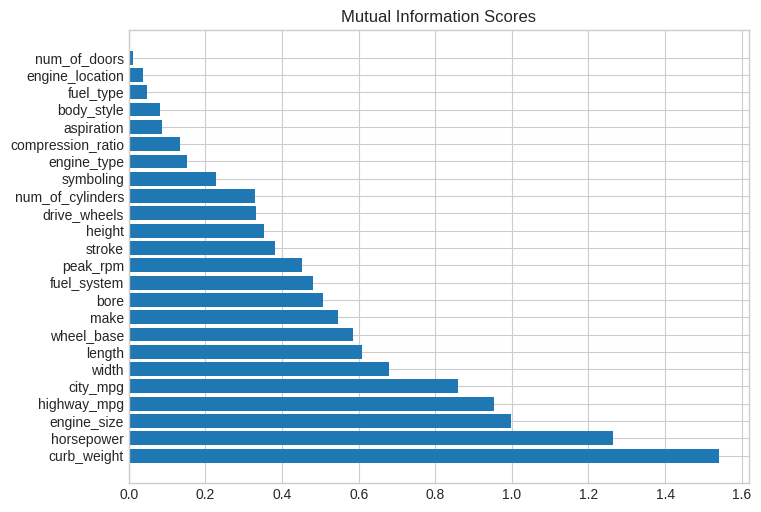

In [51]:
##np.arrange is used to get evenly spaced values within a given interval.
##len function returns number of items in an object
##The tics variable includes the name of list of features 

def plot_mi_scores(scores):
  scores = scores.sort_values(ascending = False)
  width = np.arange(len(scores))
  plt.barh(width, scores)
  ticks = list(scores.index)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")

plt.figure(dpi =100, figsize = (8,6))
plot_mi_scores(mi_scores)

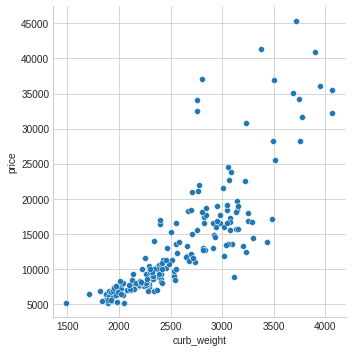

In [ ]:
sns.relplot(x = "curb_weight", y = "price", data = df_auto)

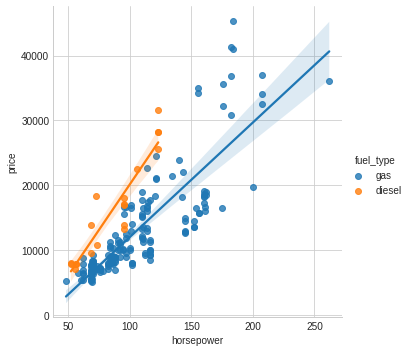

In [54]:
sns.lmplot( x = "horsepower", y = "price" , hue = "fuel_type",data =df_auto)

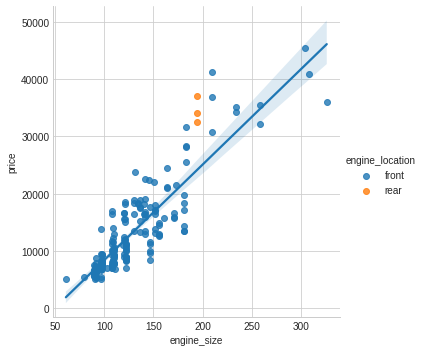

In [55]:
sns.lmplot( x = "engine_size", y = "price" , hue = "engine_location",data =df_auto)